CA 2 - STRATEGIC THINKING 
SEMESTER 2 

AIRBNB PRICE - PREDICTIONS

Students: Bárbara Abreu Costa 2023099 | Juliana Cristina da Cunha Brum 2023021

GitHub Repository: https://github.com/Babreucosta/CA2_Strategic_Thinking.git


These are some libraries used to do the analysis. 

In [222]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Weekends dataset 

Downloading the dataset, London weekends and printing the first 5 columns, in order to see how the data looks like. 

In [223]:
df_weekends = pd.read_csv('london_weekends.csv')

In [224]:
df_weekends.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


The code df.info is to understand useful information such as number of columns and rows, data type, if the data has missing values. 

In [225]:
df_weekends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5379 non-null   int64  
 1   realSum                     5379 non-null   float64
 2   room_type                   5379 non-null   object 
 3   room_shared                 5379 non-null   bool   
 4   room_private                5379 non-null   bool   
 5   person_capacity             5379 non-null   float64
 6   host_is_superhost           5379 non-null   bool   
 7   multi                       5379 non-null   int64  
 8   biz                         5379 non-null   int64  
 9   cleanliness_rating          5379 non-null   float64
 10  guest_satisfaction_overall  5379 non-null   float64
 11  bedrooms                    5379 non-null   int64  
 12  dist                        5379 non-null   float64
 13  metro_dist                  5379 

The codes below are to drop some unimportant columns, and to get the dataset's head (5 first rows) again. 

In [226]:
df_weekends = df_weekends.drop(['Unnamed: 0', 'room_shared', 'room_private', 'multi', 
             'biz', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)

In [227]:
df_weekends.head()

,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
0,121.122322,Private room,2.0,False,6.0,69.0,1,5.734117,0.437094,-0.04975,51.52570
1,195.912416,Private room,2.0,False,10.0,96.0,1,4.788905,1.464050,-0.08475,51.54210
2,193.325337,Private room,3.0,False,10.0,95.0,1,4.596677,0.450306,-0.14585,51.54802
3,180.389943,Private room,2.0,False,9.0,87.0,1,2.054769,0.132670,-0.10611,51.52108
4,405.700981,Entire home/apt,3.0,False,7.0,65.0,0,4.491277,0.354108,-0.18797,51.49399


As the features room_type and host_is_superhost have object and boolen values, to apply machine learning, it was necessary to change them for numeric values using pd.get_dummies.   

In [228]:
df_weekends = pd.get_dummies(df_weekends, columns=['room_type', 'host_is_superhost'])


The next code is apply F-test and check which features could have more relevance to help the models to make predictions about the price. 

                       Feature      F-test        p-value
0              person_capacity  931.125006  9.475162e-189
8    room_type_Entire home/apt  804.581835  4.617726e-165
9       room_type_Private room  781.067578  1.318125e-160
3                     bedrooms  665.609981  1.776851e-138
4                         dist  308.959941   2.720133e-67
5                   metro_dist  151.232513   2.684813e-34
6                          lng   72.733706   1.906061e-17
7                          lat   31.907101   1.700284e-08
10       room_type_Shared room    4.899851   2.690083e-02
11     host_is_superhost_False    4.104073   4.282932e-02
12      host_is_superhost_True    4.104073   4.282932e-02
1           cleanliness_rating    0.532967   4.653938e-01
2   guest_satisfaction_overall    0.145873   7.025260e-01


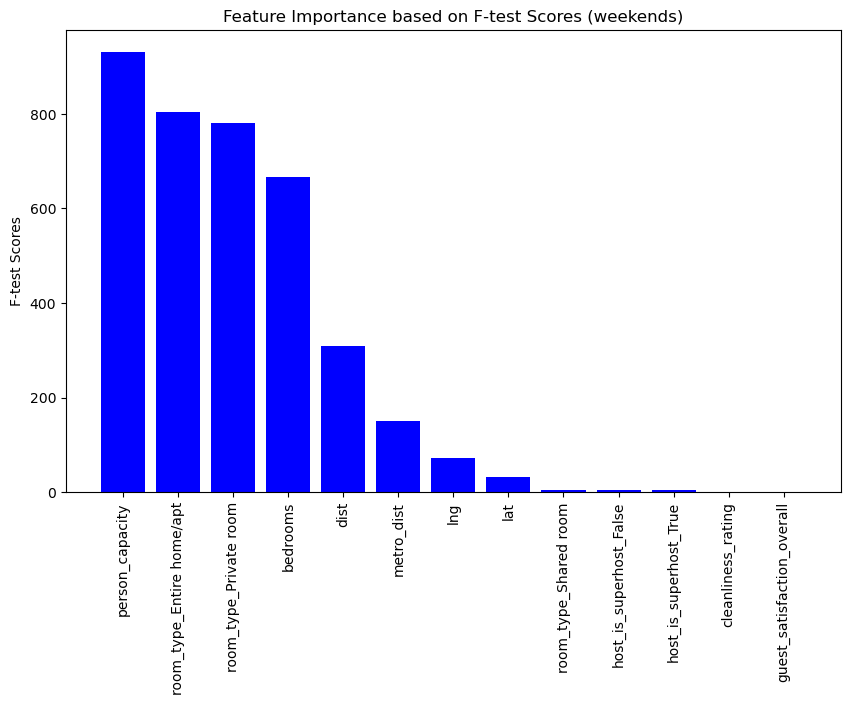

In [229]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import f_regression

X = df_weekends.drop('realSum', axis=1)
y = df_weekends['realSum']

f_values, p_values = f_regression(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'F-test': f_values, 'p-value': p_values})

feature_importance.sort_values(by='F-test', ascending=False, inplace=True)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['F-test'], color='b', align='center')
plt.xlabel('')
plt.ylabel('F-test Scores')
plt.title('Feature Importance based on F-test Scores (weekends)')
plt.xticks(rotation=90)
plt.show()


The codes are to split the data into X and y. For X, were chosen the 8 columns which have the highest F-test scores and y is the realSum column, which is related to price. 

In [266]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_weekends[['person_capacity','room_type_Entire home/apt', 'room_type_Private room',
                 'bedrooms', 'dist', 'metro_dist', 'lng', 'lat']] 
y = df_weekends['realSum']  



In [269]:
print(X,y)

      person_capacity  room_type_Entire home/apt  room_type_Private room  \
0                 2.0                          0                       1   
1                 2.0                          0                       1   
2                 3.0                          0                       1   
3                 2.0                          0                       1   
4                 3.0                          1                       0   
...               ...                        ...                     ...   
5374              2.0                          0                       1   
5375              2.0                          0                       1   
5376              2.0                          1                       0   
5377              2.0                          0                       1   
5378              2.0                          1                       0   

      bedrooms      dist  metro_dist      lng       lat  
0            1  5.734117    0

### Linear Regression

The first algorithm applied was Linear Regression. So the code is to split the data into train and test, with 20% of test, to apply the Linear Regression model, to perform the cross validation K-fold with 5 splits, calculate the Mean Squared Error (MSE), the R_squared and plot the results. 

Average Mean Squared Error: 0.04066972613115978
Mean Squared Error (test set): 0.04537920127223993


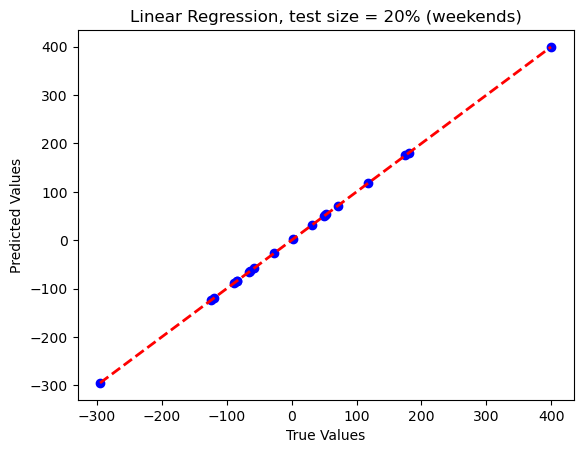

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X and y are your feature matrix and target variable
# X = ...
# y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
mse_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    # Train the model on the training fold
    model.fit(X_train_kf, y_train_kf)

    # Predict on the validation fold
    y_pred_kf = model.predict(X_val_kf)

    # Calculate MSE for the fold
    mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))

# Calculate average MSE across all folds
average_mse = np.mean(mse_scores)

# Print the average MSE
print("Average Mean Squared Error:", average_mse)

# Train the model on the entire training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate the MSE for the test set
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the MSE for the test set
print("Mean Squared Error (test set):", mse_test)

# Plot the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression, test size = 20% (weekends)')
plt.show()


The next code, is exact to do the same was done before, but here using 30% of the data for test. 

Average Mean Squared Error: 0.043757810335379524
Mean Squared Error (test set): 0.038759892732058335


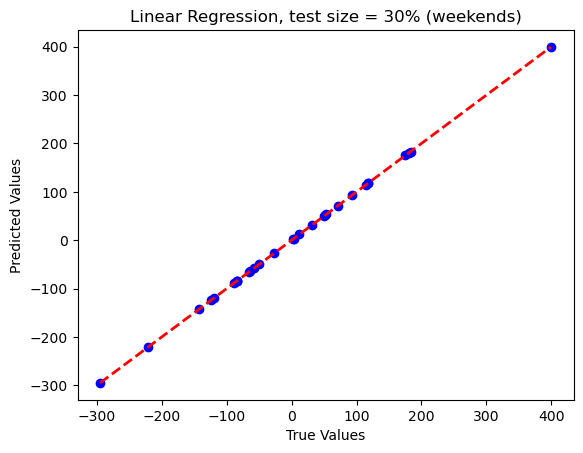

In [282]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X and y are your feature matrix and target variable
# X = ...
# y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
mse_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    # Train the model on the training fold
    model.fit(X_train_kf, y_train_kf)

    # Predict on the validation fold
    y_pred_kf = model.predict(X_val_kf)

    # Calculate MSE for the fold
    mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))

# Calculate average MSE across all folds
average_mse = np.mean(mse_scores)

# Print the average MSE
print("Average Mean Squared Error:", average_mse)

# Train the model on the entire training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate the MSE for the test set
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the MSE for the test set
print("Mean Squared Error (test set):", mse_test)

# Plot the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression, test size = 30% (weekends)')
plt.show()


### Random Forest 

This code is to split the data into train and test, with 20% of test, apply the Random Forest Model, the K_fold cross validation, calculate the MSE and R_squared and plot the results. 

Mean Squared Error: 593.1938393834197
R-squared: 0.9137892296935589


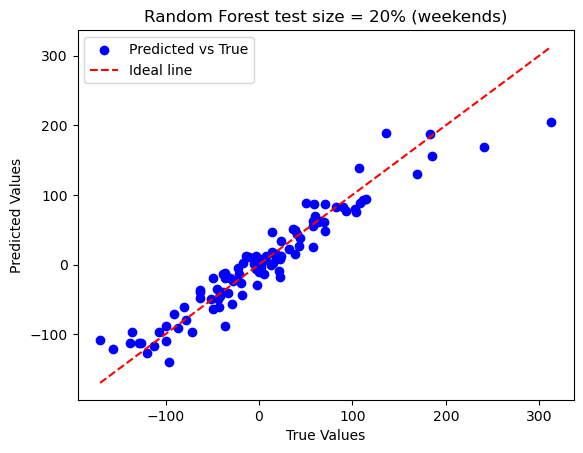

In [287]:
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the mean squared error and R-squared for the predicted values
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the mean squared error and R-squared
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest test size = 20% (weekends)')
plt.legend()
plt.show()


The code is to apply the same algorithm, but now using 30% of the data for test. 

Mean Squared Error: 593.1938393834197
R-squared: 0.9137892296935589


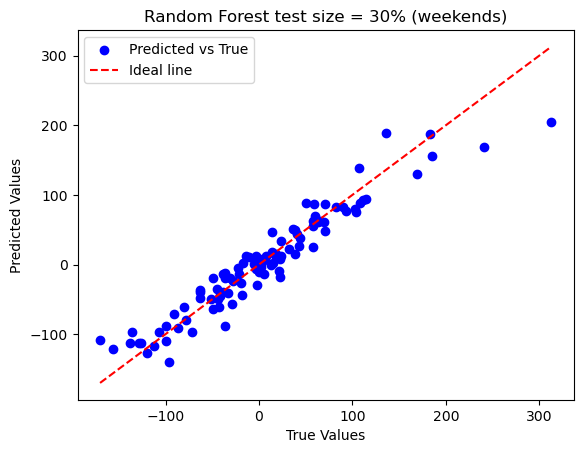

In [288]:
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the mean squared error and R-squared for the predicted values
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the mean squared error and R-squared
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest test size = 30% (weekends)')
plt.legend()
plt.show()


### Gradiente Boosting Regressor

Code to split the data, with 20% to test, apply the model, perform the cross validation K-fold, calculate MSE and plot the result. 



Mean Squared Error: 424.8869479714616


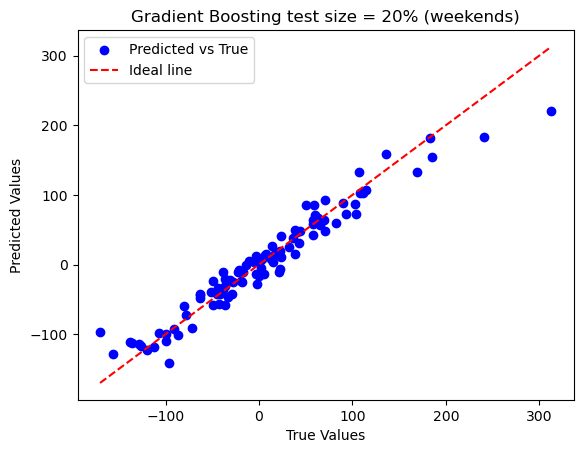

In [289]:
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the mean squared error for the predicted values
mse = mean_squared_error(y, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting test size = 20% (weekends)')
plt.legend()
plt.show()


The next code is to apply the code using 30% of the data for test. 

Mean Squared Error: 424.8869479714616


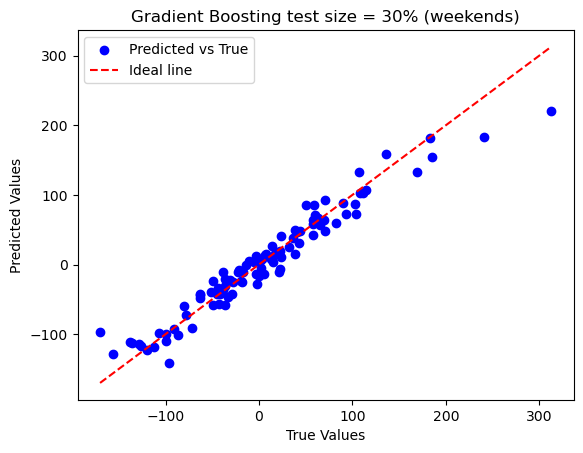

In [290]:
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the mean squared error for the predicted values
mse = mean_squared_error(y, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting test size = 30% (weekends)')
plt.legend()
plt.show()


### XGBRegressor

Code to split the data into train an test, with 20% for test, create a XGBRegressor model, apply K-fold cross validation, calculate the MSE and plot the results. 


Mean Squared Error: 421.09427340563906


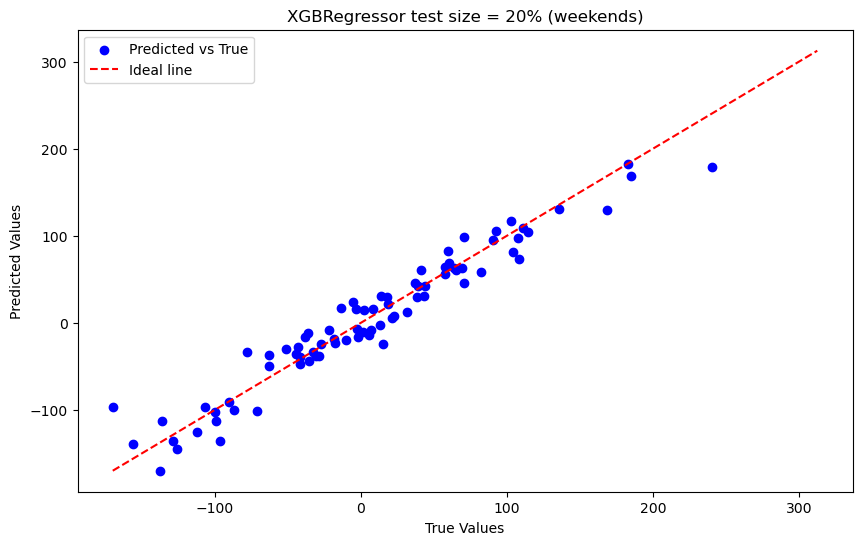

In [291]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor
model = XGBRegressor()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X_train, y_train, cv=kf)

# Calculate the mean squared error for the predicted values
mse = mean_squared_error(y_train, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBRegressor test size = 20% (weekends)')
plt.legend()
plt.show()


The same code, but now to apply the model using 30% of the data for test. 

Mean Squared Error: 614.1804759378538


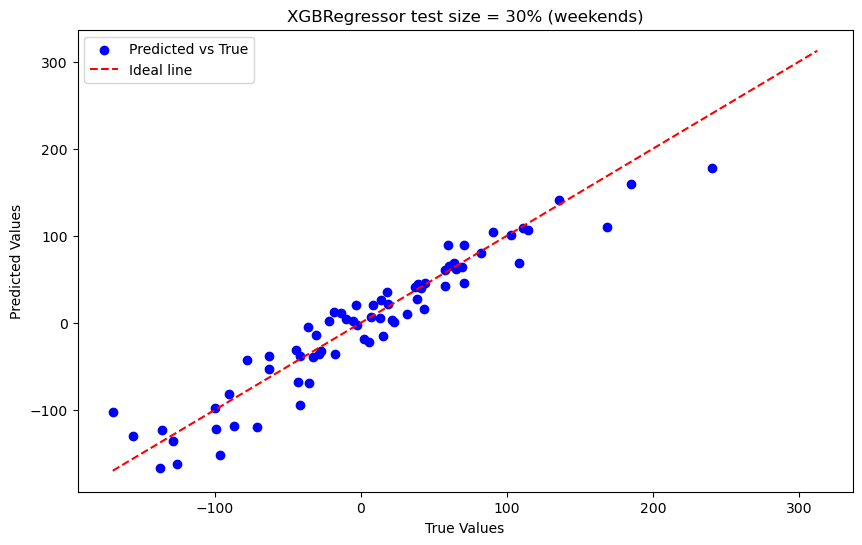

In [292]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost Regressor
model = XGBRegressor()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X_train, y_train, cv=kf)

# Calculate the mean squared error for the predicted values
mse = mean_squared_error(y_train, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBRegressor test size = 30% (weekends)')
plt.legend()
plt.show()


#### Comparison between results of the models, using the MSE. 


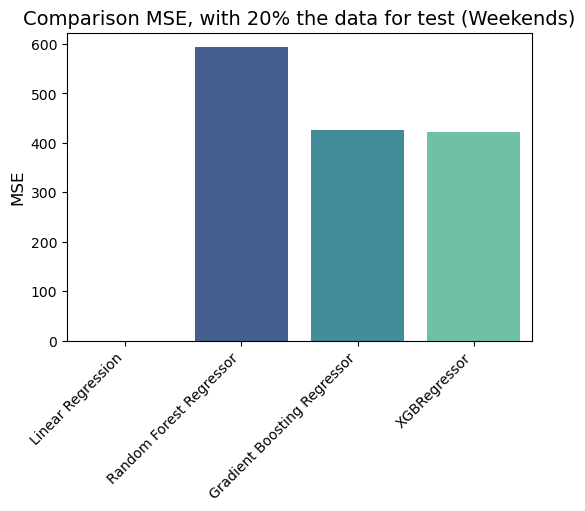

In [293]:
model_names = ["Linear Regression", "Random Forest Regressor",
              "Gradient Boosting Regressor", "XGBRegressor"]

mse_values = [0.04066972613115978, 593.1938393834197, 424.88694797146166, 421.09427340563906]  

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=model_names, y=mse_values, palette="mako")
plt.title('Comparison MSE, with 20% the data for test (Weekends)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('MSE', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.show()

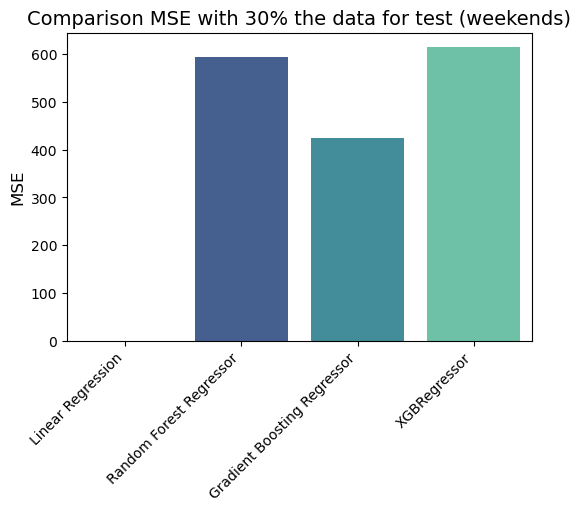

In [286]:
model_names = ["Linear Regression", "Random Forest Regressor",
              "Gradient Boosting Regressor", "XGBRegressor"]

mse_values = [ 0.043757810335379524, 593.1938393834197, 424.8869479714616, 614.1804759378538]  

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=model_names, y=mse_values, palette="mako")
plt.title('Comparison MSE with 30% the data for test (weekends)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('MSE', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.show()

### Weekdays dataset

Loading dataset London weekdays, and geting the first 5 rows to see the dataset.

In [157]:
df_weekdays = pd.read_csv('london_weekdays.csv')

In [158]:
df_weekdays.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


df.info to see information abou the dataset, such as number of the row, columns, data type, if it has missing values, etc. 

In [159]:
df_weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4614 non-null   int64  
 1   realSum                     4614 non-null   float64
 2   room_type                   4614 non-null   object 
 3   room_shared                 4614 non-null   bool   
 4   room_private                4614 non-null   bool   
 5   person_capacity             4614 non-null   float64
 6   host_is_superhost           4614 non-null   bool   
 7   multi                       4614 non-null   int64  
 8   biz                         4614 non-null   int64  
 9   cleanliness_rating          4614 non-null   float64
 10  guest_satisfaction_overall  4614 non-null   float64
 11  bedrooms                    4614 non-null   int64  
 12  dist                        4614 non-null   float64
 13  metro_dist                  4614 

Dropping some irrelevant columns

In [160]:
df_weekdays = df_weekdays.drop(['Unnamed: 0', 'room_shared', 'room_private', 'multi', 
             'biz', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)


In [161]:
df_weekdays.head()

,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
0,570.098074,Entire home/apt,2.0,False,10.0,98.0,1,5.301018,1.588990,-0.16032,51.46531
1,297.984430,Private room,2.0,True,10.0,99.0,1,2.198946,0.379262,-0.09683,51.50343
2,336.790611,Private room,2.0,False,10.0,96.0,1,2.322958,0.453178,-0.10554,51.52407
3,226.722171,Private room,2.0,True,10.0,99.0,1,5.707825,1.723977,-0.16575,51.46292
4,256.355982,Private room,3.0,False,9.0,98.0,1,3.257945,0.825417,-0.12055,51.53728


As the columns 'room_type' and 'host_is_superhost' have object and boolean values, in order to apply machine learning is necessary to change them to numerical values. 

In [162]:
df_weekdays = pd.get_dummies(df_weekdays, columns=['room_type', 'host_is_superhost'])



In [163]:
df_weekdays

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_False,host_is_superhost_True
0,570.098074,2.0,10.0,98.0,1,5.301018,1.588990,-0.16032,51.46531,1,0,0,1,0
1,297.984430,2.0,10.0,99.0,1,2.198946,0.379262,-0.09683,51.50343,0,1,0,0,1
2,336.790611,2.0,10.0,96.0,1,2.322958,0.453178,-0.10554,51.52407,0,1,0,1,0
3,226.722171,2.0,10.0,99.0,1,5.707825,1.723977,-0.16575,51.46292,0,1,0,0,1
4,256.355982,3.0,9.0,98.0,1,3.257945,0.825417,-0.12055,51.53728,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,310.449446,2.0,10.0,100.0,1,6.347654,0.445862,-0.21207,51.48667,0,1,0,1,0
4610,265.057974,4.0,8.0,84.0,1,5.231706,0.463949,-0.05459,51.52018,1,0,0,1,0
4611,142.289329,2.0,10.0,97.0,1,8.867238,2.675007,-0.12056,51.42875,0,1,0,1,0
4612,372.304146,2.0,8.0,80.0,1,7.576798,1.682697,-0.12810,51.44023,0,1,0,1,0


In [164]:
df_weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     4614 non-null   float64
 1   person_capacity             4614 non-null   float64
 2   cleanliness_rating          4614 non-null   float64
 3   guest_satisfaction_overall  4614 non-null   float64
 4   bedrooms                    4614 non-null   int64  
 5   dist                        4614 non-null   float64
 6   metro_dist                  4614 non-null   float64
 7   lng                         4614 non-null   float64
 8   lat                         4614 non-null   float64
 9   room_type_Entire home/apt   4614 non-null   uint8  
 10  room_type_Private room      4614 non-null   uint8  
 11  room_type_Shared room       4614 non-null   uint8  
 12  host_is_superhost_False     4614 non-null   uint8  
 13  host_is_superhost_True      4614 

### F-test score

Applying F-test to see the feature importance. 

                       Feature      F-test        p-value
8    room_type_Entire home/apt  543.429027  1.008795e-113
0              person_capacity  534.988675  4.444089e-112
9       room_type_Private room  528.536053  8.062167e-111
3                     bedrooms  435.310255   1.877026e-92
4                         dist  198.338066   3.908279e-44
5                   metro_dist   88.618971   7.356956e-21
6                          lng   45.776587   1.490984e-11
7                          lat   19.023499   1.319356e-05
10       room_type_Shared room    2.867082   9.047619e-02
1           cleanliness_rating    1.711440   1.908639e-01
2   guest_satisfaction_overall    0.742482   3.889117e-01
12      host_is_superhost_True    0.001560   9.684997e-01
11     host_is_superhost_False    0.001560   9.684997e-01


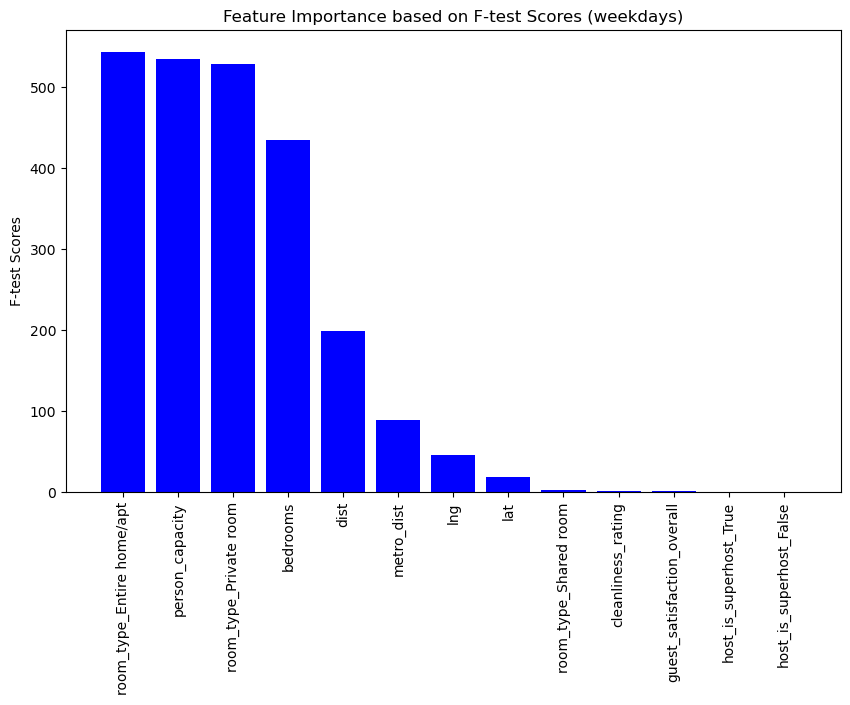

In [165]:
# Assuming your data is stored in a pandas DataFrame named 'data'
# Extract the features and the target variable
X = df_weekdays.drop('realSum', axis=1)
y = df_weekdays['realSum']

# Compute the F-test and the p-values for the features
f_values, p_values = f_regression(X, y)

# Create a DataFrame to store feature names, F-test scores, and p-values
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-test': f_values, 'p-value': p_values})

# Sort the features based on F-test scores in descending order
feature_importance.sort_values(by='F-test', ascending=False, inplace=True)

# Print the feature ranking
print(feature_importance)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['F-test'], color='b', align='center')
plt.xlabel('')
plt.ylabel('F-test Scores')
plt.title('Feature Importance based on F-test Scores (weekdays)')
plt.xticks(rotation=90)
plt.show()


Spliting the data into X and y. Where X are the features that had the highest f-test score and y is the dependent column. 

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame, and 'target_column' is the name of your target variable
# Define your feature matrix and target variable
X = df_weekdays[['person_capacity','bedrooms', 'dist', 'metro_dist', 'room_type_Entire home/apt', 
         'room_type_Private room', 'lng', 'lat']] 
y = df_weekdays['realSum']  # Replace 'target_column' with your actual target variable name


### Linear Regression

Applying Linear Regression using 20% of the data for test, K-fold cross validation (5 splits), calculate MSE and plot the results. 



Average Mean Squared Error (Test Size = 0.2): 0.04083717102167901


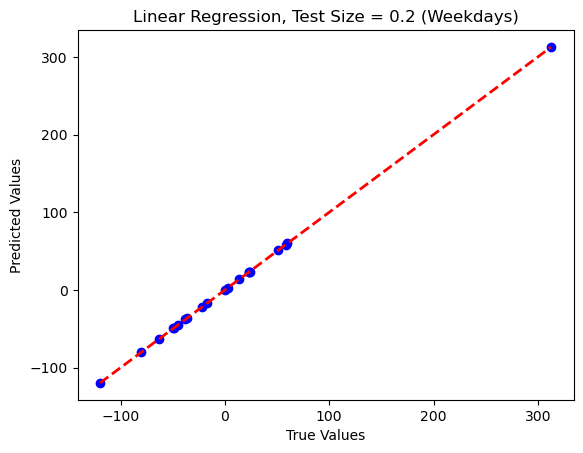


Average Mean Squared Error (Test Size = 0.3): 0.04000251805130827


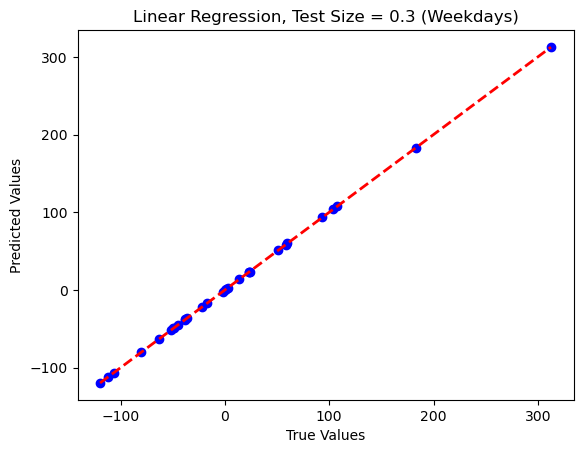

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

# Define the test sizes
test_sizes = [0.2, 0.3]

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize KFold with 5 splits
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics
    mse_scores = []

    # Create a Linear Regression model
    model = LinearRegression()

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

        # Train the model on the training fold
        model.fit(X_train_kf, y_train_kf)

        # Predict on the validation fold
        y_pred_kf = model.predict(X_val_kf)

        # Calculate MSE for the fold
        mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))

    # Calculate average MSE across all folds
    average_mse = np.mean(mse_scores)

    # Print average MSE
    print(f"\nAverage Mean Squared Error (Test Size = {test_size}):", average_mse)

    # Optionally, train the model on the entire dataset
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Plot true vs predicted values for the test set
    plt.scatter(y_test, y_pred_test, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Linear Regression, Test Size = {test_size} (Weekdays)')
    plt.show()


### Random Forest 

Applying Random Forest with 20% and 30% of the data for test, K-fold cross validation, evaluate the model using MSE and plotting the results. 


Average Mean Squared Error (Test Size = 0.2 : 552.2908935851385


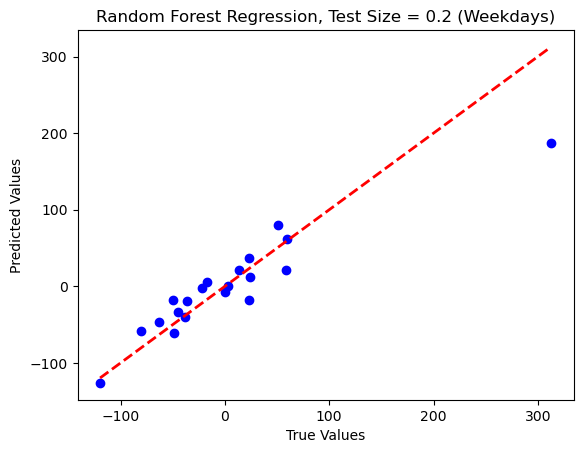


Average Mean Squared Error (Test Size = 0.3 : 653.051572765293


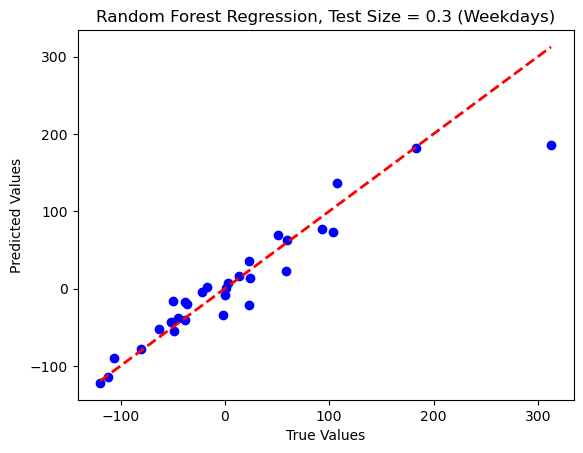

In [202]:
from sklearn.ensemble import RandomForestRegressor

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

# Define the test sizes
test_sizes = [0.2, 0.3]

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize KFold with 5 splits
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics
    mse_scores = []

    # Create a Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

        # Train the model on the training fold
        model.fit(X_train_kf, y_train_kf)

        # Predict on the validation fold
        y_pred_kf = model.predict(X_val_kf)

        # Calculate MSE for the fold
        mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))

    # Calculate average MSE across all folds
    average_mse = np.mean(mse_scores)

    # Print average MSE
    print(f"\nAverage Mean Squared Error (Test Size = {test_size} :", average_mse)

    # Optionally, train the model on the entire dataset
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Plot true vs predicted values for the test set
    plt.scatter(y_test, y_pred_test, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Random Forest Regression, Test Size = {test_size} (Weekdays)')
    plt.show()


### Gradient Boosting Regressor

Code to apply the model with 20% and 30% of the data for test, apply cross validation, calculate the MSE and plot the results 


Average Mean Squared Error (Test Size = 0.2): 489.5392613694661


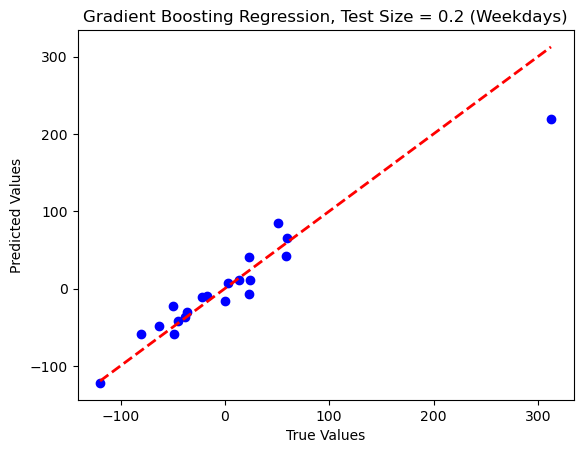


Average Mean Squared Error (Test Size = 0.3): 362.0642213875164


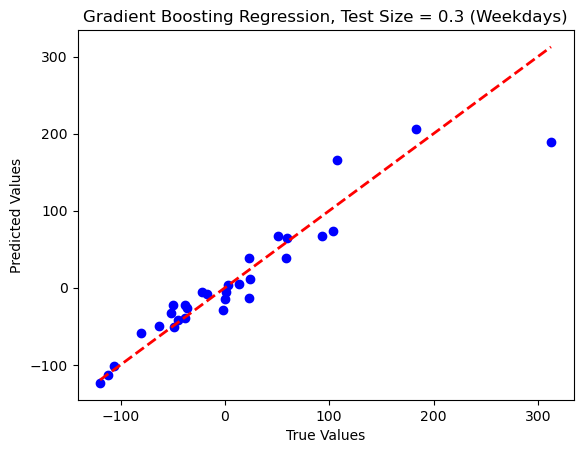

In [203]:
from sklearn.ensemble import GradientBoostingRegressor

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

# Define the test sizes
test_sizes = [0.2, 0.3]

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize KFold with 5 splits
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics
    mse_scores = []

    # Create a Gradient Boosting Regressor model
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

        # Train the model on the training fold
        model.fit(X_train_kf, y_train_kf)

        # Predict on the validation fold
        y_pred_kf = model.predict(X_val_kf)

        # Calculate MSE for the fold
        mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))

    # Calculate average MSE across all folds
    average_mse = np.mean(mse_scores)

    # Print average MSE
    print(f"\nAverage Mean Squared Error (Test Size = {test_size}):", average_mse)

    # Optionally, train the model on the entire dataset
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Plot true vs predicted values for the test set
    plt.scatter(y_test, y_pred_test, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Gradient Boosting Regression, Test Size = {test_size} (Weekdays)')
    plt.show()


### XGBRegressor 

Code to apply  XGB Regressor with 20%  and 30% of the data for test, cross validation K-fold, evaluate MSE and plot the results.



Average Mean Squared Error (Test Size = 0.2): 421.09427340563906


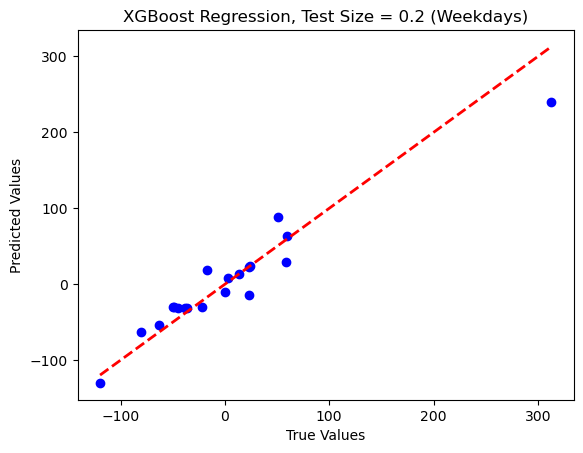


Average Mean Squared Error (Test Size = 0.3): 614.1804759378538


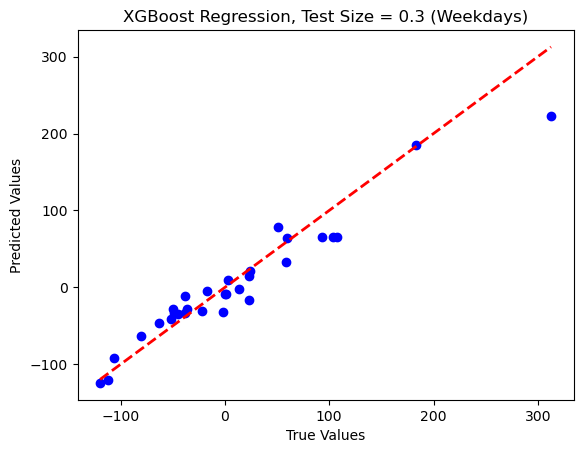

In [204]:
from xgboost import XGBRegressor

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.2, random_state=42)

# Define the test sizes
test_sizes = [0.2, 0.3]

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize KFold with 5 splits
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics
    mse_scores = []

    # Create an XGBoost Regressor model
    model = XGBRegressor()

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

        # Train the model on the training fold
        model.fit(X_train_kf, y_train_kf)

        # Predict on the validation fold
        y_pred_kf = model.predict(X_val_kf)

        # Calculate MSE for the fold
        mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))

    # Calculate average MSE across all folds
    average_mse = np.mean(mse_scores)

    # Print average MSE
    print(f"\nAverage Mean Squared Error (Test Size = {test_size}):", average_mse)

    # Optionally, train the model on the entire dataset
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Plot true vs predicted values for the test set
    plt.scatter(y_test, y_pred_test, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'XGBoost Regression, Test Size = {test_size} (Weekdays)')
    plt.show()


### MSE results comparison 

Plot the comparison among the models results, for 20% and 30% of the data. 

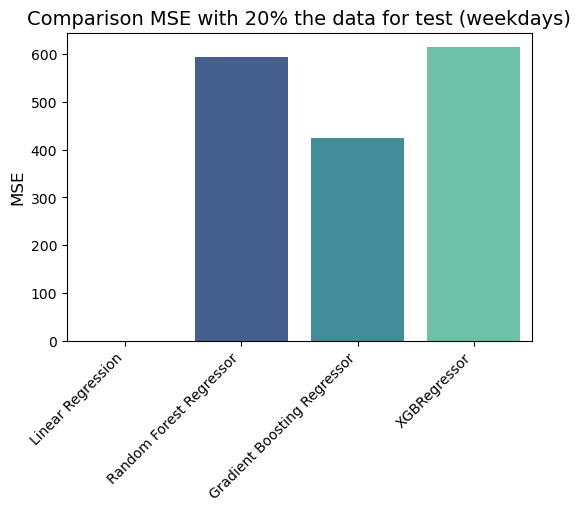

In [207]:

model_names = ["Linear Regression", "Random Forest Regressor",
              "Gradient Boosting Regressor", "XGBRegressor"]

mse_results = [0.04083717102167901, 552.2908935851385, 489.5392613694661,421.09427340563906]

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=model_names, y=mse_values, palette="mako")
plt.title('Comparison MSE with 20% the data for test (weekdays)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('MSE', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.show()


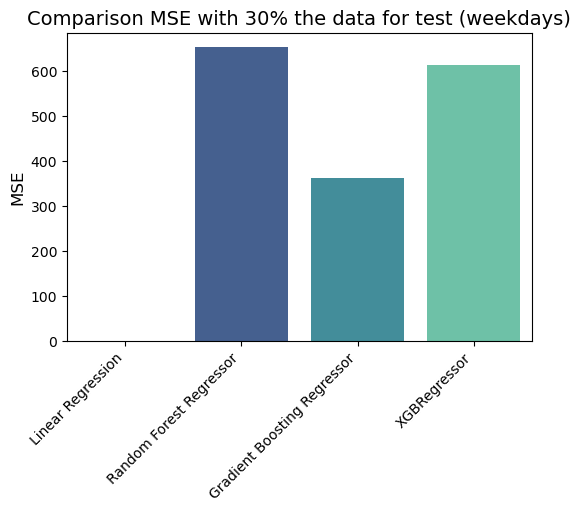

In [209]:
model_names = ["Linear Regression", "Random Forest Regressor",
              "Gradient Boosting Regressor", "XGBRegressor"]

mse_values = [ 0.04000251805130827, 653.051572765293, 362.0642213875164, 614.1804759378538]  

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=model_names, y=mse_values, palette="mako")
plt.title('Comparison MSE with 30% the data for test (weekdays)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('MSE', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.show()